In [94]:
# Import necessary libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [96]:
# Load your data
df = pd.read_csv(r"C:\Users\marlo\OneDrive\Desktop\adult (1)\adult.datasetv4.csv")
df.head()

,Education_level,Marriage_status,Race,Income
0,Bachelors,Never-married,White,<=50K
1,Bachelors,Married-civ-spouse,White,<=50K
2,HS-grad,Divorced,White,<=50K
3,11th,Married-civ-spouse,Black,<=50K
4,Bachelors,Married-civ-spouse,Black,<=50K


In [98]:
# Define education level mapping to simplify categories
education_mapping = {
    "preschool": "primary education",
    "1st-4th": "primary education",
    "5th-6th": "primary education",
    "7th-8th": "secondary education",
    "9th": "secondary education",
    "10th": "secondary education",
    "11th": "secondary education",
    "12th": "secondary education",
    "hs-grad": "secondary education",
    "some-college": "some college",
    "assoc-acdm": "some college",
    "assoc-voc": "some college",
    "bachelors": "undergraduate degree",
    "masters": "postgraduate degree",
    "doctorate": "postgraduate degree",
    "prof-school": "postgraduate degree"
}


# Apply education level mapping and create a binary married column
df["Education_level"] = df["Education_level"].str.strip().str.lower()
df["Simplified_Education_level"] = df["Education_level"].map(education_mapping)

# Step 1: Standardize text by stripping whitespace and converting to lowercase
df["Marriage_status"] = df["Marriage_status"].str.strip().str.lower()
df["Income"] = df["Income"].str.strip().str.lower()
df["Race"] = df["Race"].str.strip().str.lower()

# Step 2: Define the married statuses, ensuring they match the standardized text
married_statuses = ["married-civ-spouse", "married-spouse-absent", "married-af-spouse"]

# Step 3: Apply the lambda function to classify 'Married' status and "Income" status
df["Married"] = df["Marriage_status"].apply(lambda x: 1 if x in married_statuses else 0)
df["Over_50k"] = df["Income"].apply(lambda x: 1 if x in ">50k" else 0)


### Converted "Married" and "Over_50k" to numerical format

In [101]:
df.head()

,Education_level,Marriage_status,Race,Income,Simplified_Education_level,Married,Over_50k
0,bachelors,never-married,white,<=50k,undergraduate degree,0,0
1,bachelors,married-civ-spouse,white,<=50k,undergraduate degree,1,0
2,hs-grad,divorced,white,<=50k,secondary education,0,0
3,11th,married-civ-spouse,black,<=50k,secondary education,1,0
4,bachelors,married-civ-spouse,black,<=50k,undergraduate degree,1,0


In [103]:
# Label encode education level and one-hot encode race for use in the decision tree
le_education = LabelEncoder()

df["Education_Pedigree"] = le_education.fit_transform(df["Simplified_Education_level"])
df = df.drop(columns=["Simplified_Education_level","Education_level", "Marriage_status","Income"])

df.head()

,Race,Married,Over_50k,Education_Pedigree
0,white,0,0,4
1,white,1,0,4
2,white,0,0,2
3,black,1,0,2
4,black,1,0,4


In [105]:
df = pd.get_dummies(df, columns=["Race"], prefix="Race", dtype=int)
#df = pd.concat([df, Lineage], axis=1)
df.head()

,Married,Over_50k,Education_Pedigree,Race_amer-indian-eskimo,Race_asian-pac-islander,Race_black,Race_other,Race_white
0,0,0,4,0,0,0,0,1
1,1,0,4,0,0,0,0,1
2,0,0,2,0,0,0,0,1
3,1,0,2,0,0,1,0,0
4,1,0,4,0,0,1,0,0


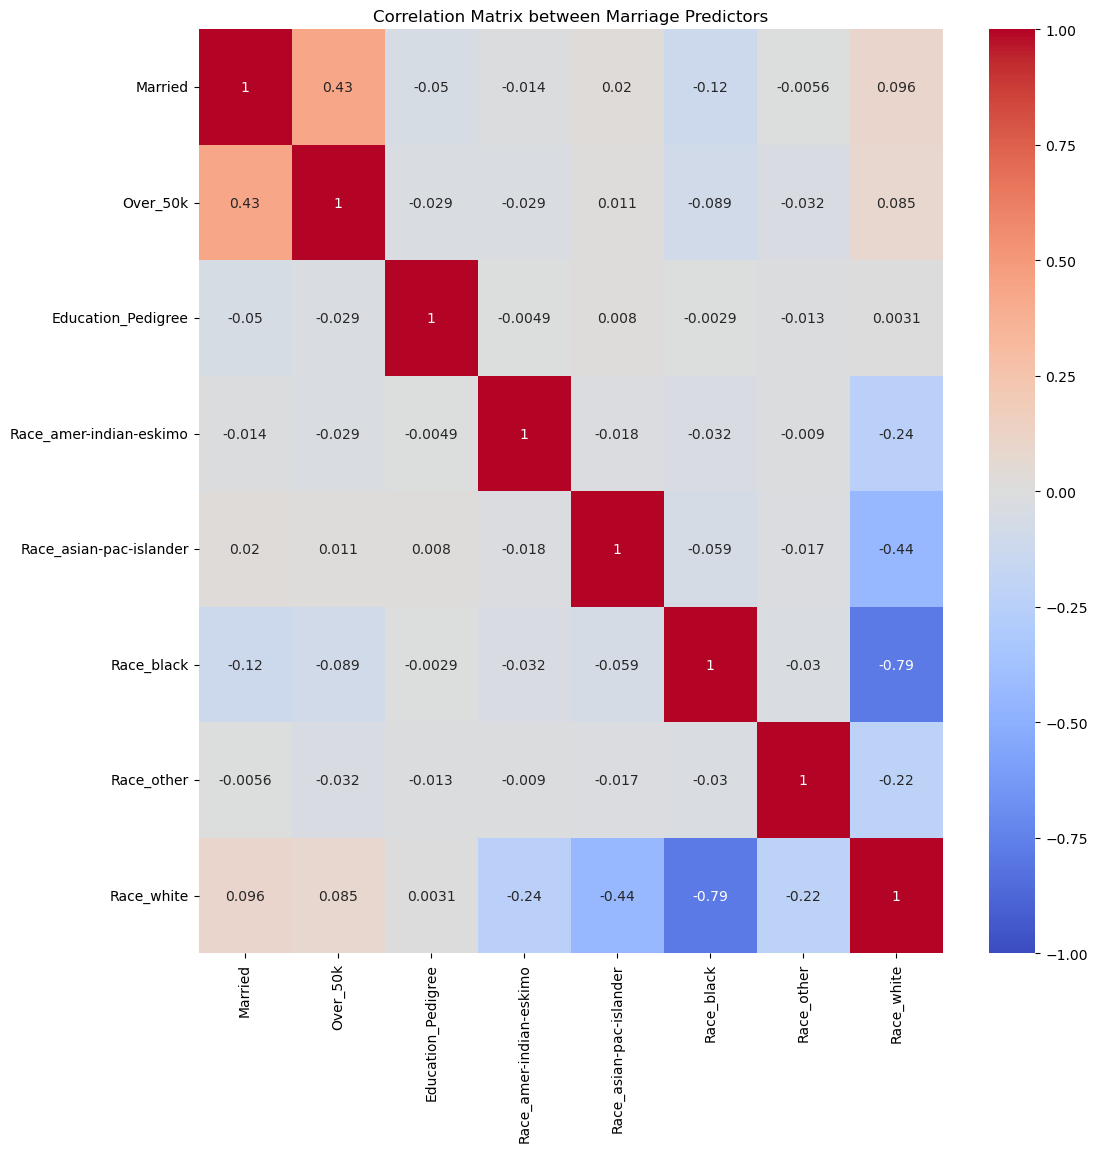

In [107]:
plt.figure(figsize= (12,12))
sns.heatmap(df.corr(), annot= True, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.title("Correlation Matrix between Marriage Predictors")
plt.show()

In [113]:
X=df[['Education_Pedigree',	'Over_50k',	'Race_amer-indian-eskimo',	'Race_asian-pac-islander',	'Race_black',	'Race_other',	'Race_white']]
y = df["Married"]


In [115]:
#fit / train the logistic regression

logit_model = smf.logit('y ~ X', data=df)

In [117]:
result = logit_model.fit()

         Current function value: 0.584700
         Iterations: 35


C:\Users\marlo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [119]:
#print stat summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32554
Method:                           MLE   Df Model:                            6
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                  0.1547
Time:                        01:29:38   Log-Likelihood:                -19038.
converged:                      False   LL-Null:                       -22524.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3363    1.1e+06  -3.06e-07      1.000   -2.16e+06    2.16e+06
X[0]          -0.1032      0.013     -8.192      0.000      -0.128      -0.079
X[1]           2.3978      0.035     67.976      0.000       2.329       2.467
X[2]          -0.0662    1.1e+06  -6.01e-08      1.000   -2.16e+06    2.16e+06
X[3]           0.1972    1.1e+06   1.79e-07      1.000   -2.16e+06    2.16e+06
X[4]          -0.6693    1.1e+06  -6.08e-07      1.000   -2.16e+06    2.16e+06
X[5]           0.1619    1.1e+06   1.47e-07      1.000   -2.16e+06    2.16e+06
X[6]           0.0401    1.1e+06   3.64e-08      1.000   -2.16e+06    2.16e+06
==============================================================================
"""

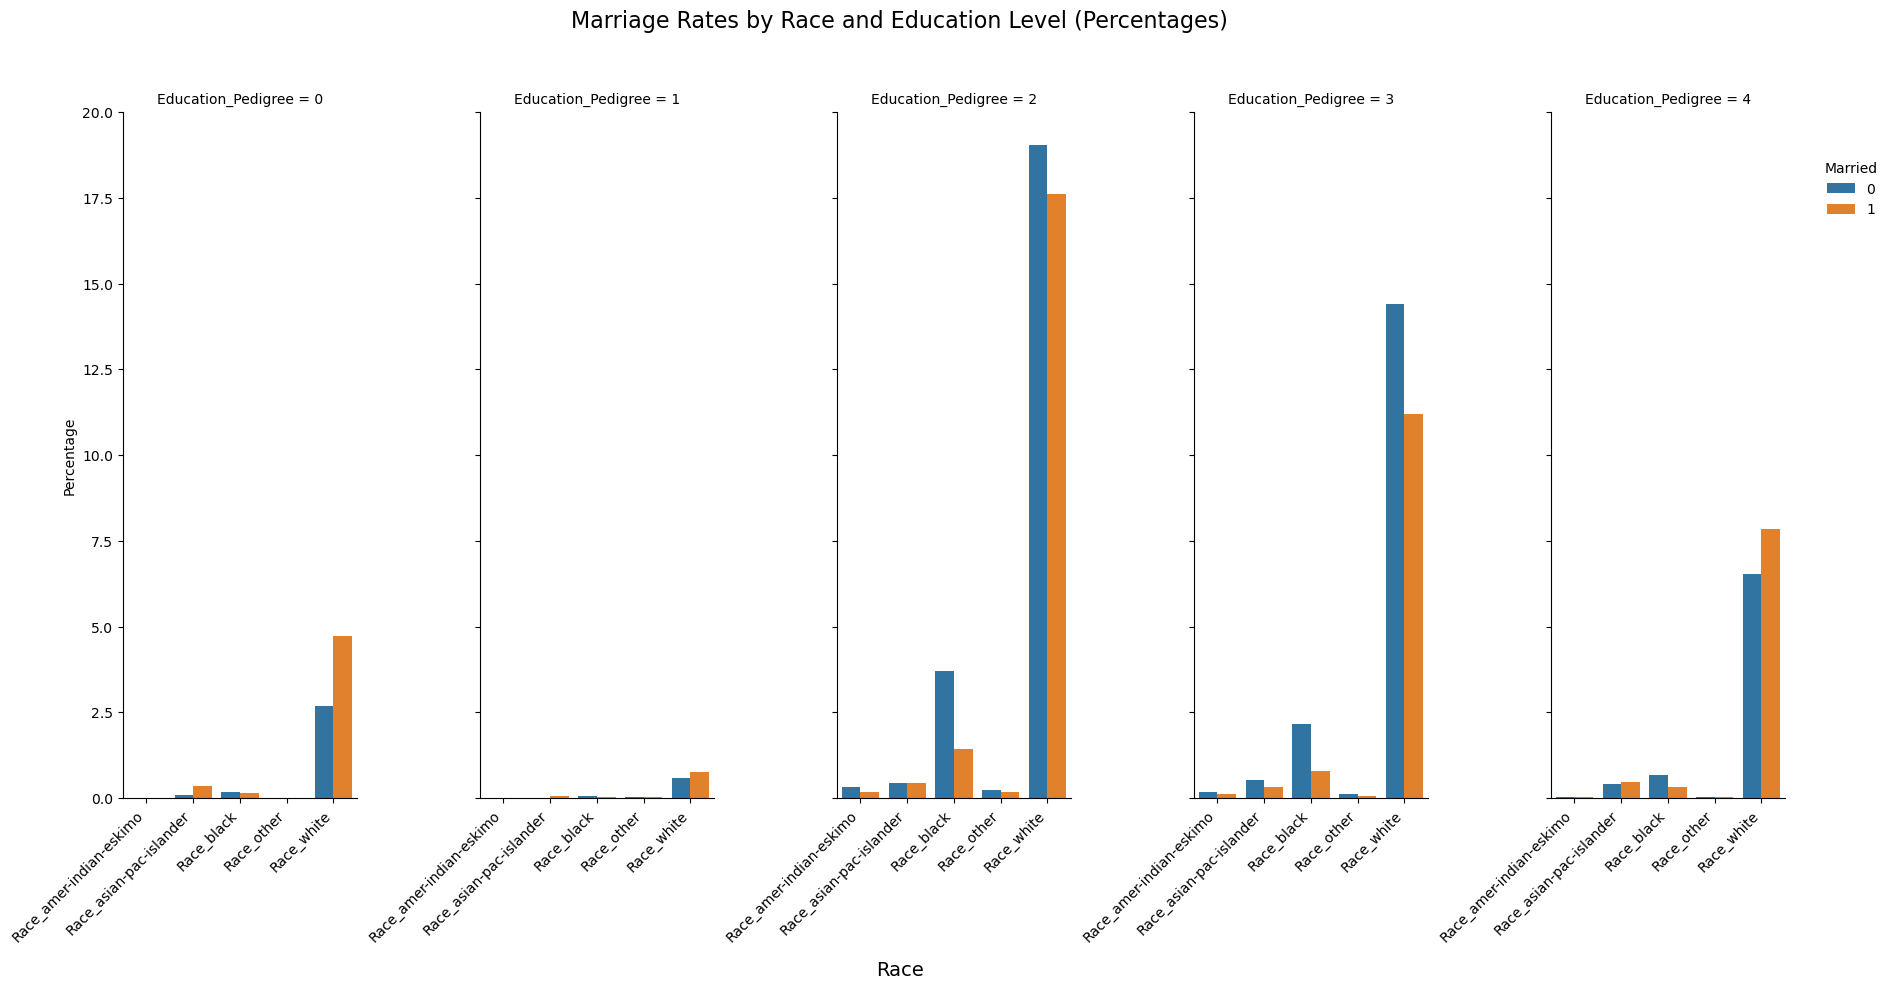

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the catplot
g = sns.catplot(
    data=df_long,
    x="Race",
    hue="Married",
    col="Education_Pedigree",
    kind="count",
    height=6,  # Increase height of each subplot
    aspect=2,  # Increase width-to-height ratio
    stat="percent",
    sharex=True  # Share the x-axis across subplots
)

# Adjust the legend position
g._legend.set_bbox_to_anchor((1.05, .8))
g._legend.set_title("Married")

# Remove individual x-axis labels and rotate ticks
g.set_axis_labels("", "Percentage")  # Clear x-axis labels for subplots
g.set_xticklabels(rotation=45, ha="right")

# Add a single, global x-axis label
g.fig.text(0.5, 0.02, "Race", ha="center", va="center", fontsize=14)

# Increase the overall figure size
g.fig.set_size_inches(18, 10)  # Width=18 inches, Height=10 inches

# Add a title and adjust spacing
g.fig.subplots_adjust(top=0.85, wspace=0.3, hspace=0.4)
g.fig.suptitle("Marriage Rates by Race and Education Level (Percentages)", fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the labels
plt.show()
